# Enhancing ASReview Insights

In [58]:
import os
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from asreview import open_state
from asreviewcontrib.insights.utils import pad_simulation_labels

## ASReview Insights Extension
The ASReview Insights Extension can be found here: https://github.com/asreview/asreview-insights/tree/main/asreviewcontrib/insights 

It includes the following files:
- _init_.py (package initialization)

- algorithms.py  (retrieve values for metrics)

- entrypoint.py (entrypoint for CLI)

- metrics.py  (return metrics in JSON file at sliced intercept)

- plot.py    (return metrics plots)

- utils.py   (get labels from state file)

## Donners 2021 Example state file (.asreview)

After running a simulation with ASReview Lab a state file is created. See the labels of an example state file below.

In [10]:
#Donners_2021 state_file outputted after default (TF-IDF + NB) simulation
#Specify file path
#os.chdir('C:/Users/.../output/simulation/Donners_2021/state_files')
with open_state('sim_Donners_2021_0.asreview') as state:     
    labels_Donners_nb= pad_simulation_labels(state,priors=False) 
print(labels_Donners_nb)

[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## Add Confusion matrix values

Confusion matrix values underlie most evaluation metrics. This applies to metrics currently in ASReview Insights, as well metrics not yet implemented. For a definition of the confusion matrix values for certainty-based active learning see the project README.https://github.com/LSped/asreview-insights-metrics-comparability/#readme

The four functions below retrieve the TP, FP, TN, FN values of the labels in a state file. Each function takes labels as an input argument. Moreoever, the arguments x_screened and x_absolute can be specified. 

If x_screened=True, the function returns the respective TP, FP, TN or FN values as the number of records screened increases. The returned values can later be used to create plots showing how they progress over number of records screened. This is not yet implemented in ASReview Insights.

If x_screened=False (default), the function returns the respective TP, FP, TN or FN values over recall. The returned values over recall can later be used to report metrics in a JSON file and Excel file to be stored in folders. Here, if x_absolute=False (default) is specified, it returns recall as the the x axis. This is currently implemented in ASReview Insights (in algorithms.py).

In [11]:
def _tp_values(labels, x_screened=False, x_absolute=False):      
    n_pos_docs = sum(labels)
    tp = np.cumsum(labels, dtype=int) 

    if x_screened:    
        return tp.tolist()

    if not x_screened: 
        x = np.arange(1, n_pos_docs + 1)
        
        if not x_absolute:
            x = x / n_pos_docs

        when_found = np.searchsorted(tp, np.arange(1, n_pos_docs + 1))
        y = tp[when_found]  

    return x.tolist(), y.tolist()

In [12]:
#returns recall and corresponding absolute TP count
_tp_values(labels_Donners_nb)

([0.07142857142857142,
  0.14285714285714285,
  0.21428571428571427,
  0.2857142857142857,
  0.35714285714285715,
  0.42857142857142855,
  0.5,
  0.5714285714285714,
  0.6428571428571429,
  0.7142857142857143,
  0.7857142857142857,
  0.8571428571428571,
  0.9285714285714286,
  1.0],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [13]:
#returns the count of TP as records screened increases
_tp_values(labels_Donners_nb,x_screened=True)

[1,
 1,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,


In [16]:
def _fp_values(labels, x_screened=False, x_absolute=False):
    
    n_pos_docs = sum(labels)
    n_docs = len(labels)
    tp = np.cumsum(labels, dtype=int)
    x = np.arange(1, n_docs + 1)
    fp = x - tp

    if x_screened:  
        return fp.tolist()
  
    if not x_screened:
    
        x = np.arange(1, n_pos_docs + 1)
        
        if not x_absolute:
            x = x / n_pos_docs

        when_found = np.searchsorted(tp, np.arange(1, n_pos_docs + 1))
        y = fp[when_found]
   
    return x.tolist(), y.tolist()

In [17]:
#returns recall and corresponding FP count
_fp_values(labels_Donners_nb)

([0.07142857142857142,
  0.14285714285714285,
  0.21428571428571427,
  0.2857142857142857,
  0.35714285714285715,
  0.42857142857142855,
  0.5,
  0.5714285714285714,
  0.6428571428571429,
  0.7142857142857143,
  0.7857142857142857,
  0.8571428571428571,
  0.9285714285714286,
  1.0],
 [0, 1, 1, 4, 9, 10, 10, 16, 16, 21, 25, 37, 37, 175])

In [20]:
def _tn_values(labels, x_screened=False, x_absolute=False):    
    n_pos_docs = sum(labels)
    n_docs = len(labels)
    tp = np.cumsum(labels, dtype=int)
    x = np.arange(1, n_docs + 1)
    n_excludes = labels.count(0)
    fp = x - tp
    tn = n_excludes - fp

    if x_screened:
        return tn.tolist()

    if not x_screened:
        x = np.arange(1, n_pos_docs + 1)
        
        if not x_absolute:
            x = x / n_pos_docs

        when_found = np.searchsorted(tp, np.arange(1, n_pos_docs + 1))
        y = tn[when_found]    

    return x.tolist(), y.tolist()

In [21]:
#returns recall and corresponding TN count
_tn_values(labels_Donners_nb)

([0.07142857142857142,
  0.14285714285714285,
  0.21428571428571427,
  0.2857142857142857,
  0.35714285714285715,
  0.42857142857142855,
  0.5,
  0.5714285714285714,
  0.6428571428571429,
  0.7142857142857143,
  0.7857142857142857,
  0.8571428571428571,
  0.9285714285714286,
  1.0],
 [242, 241, 241, 238, 233, 232, 232, 226, 226, 221, 217, 205, 205, 67])

In [22]:
def _fn_values(labels, x_screened=False, x_absolute=False):
    n_pos_docs = sum(labels)
    n_includes = int(sum(labels))
    tp = np.cumsum(labels, dtype=int)
    fn = n_includes-tp

    if x_screened:
        return fn.tolist()
    
    if not x_screened:
        x = np.arange(1, n_pos_docs + 1)

        if not x_absolute:
            x = x / n_pos_docs

        when_found = np.searchsorted(tp, np.arange(1, n_pos_docs + 1))
        y = fn[when_found]

    return x.tolist(), y.tolist()

In [23]:
#returns recall and FN count
_fn_values(labels_Donners_nb)

([0.07142857142857142,
  0.14285714285714285,
  0.21428571428571427,
  0.2857142857142857,
  0.35714285714285715,
  0.42857142857142855,
  0.5,
  0.5714285714285714,
  0.6428571428571429,
  0.7142857142857143,
  0.7857142857142857,
  0.8571428571428571,
  0.9285714285714286,
  1.0],
 [13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

## Add TNR (True Negative Rate)

See project README for the definition and relevance of TNR as an added metric:.https://github.com/LSped/asreview-insights-metrics-comparability/#readme

The True Negatives (TN) returned from _tn_values() were used in metrics.py to add the TNR to the JSON output. 

## Insights Metrics Output

Additions were made to the metrics.py file to return the confusion matrix values and the TNR at a given recall intercept. 

In [24]:
import asreview
import json
from asreviewcontrib.insights.algorithms import _erf_values
from asreviewcontrib.insights.algorithms import _recall_values
from asreviewcontrib.insights.algorithms import _wss_values

Contents of metrics.py

In [25]:
def _slice_metric(x, y, intercept):
    """Find the first value after the intercept.

    intercept[i-1] <= v < intercept[i]

    Arguments
    ---------
    x: numpy.array or list
        The values of the x-axis.
    y: numpy.array or list
        The values of the y-axis.
    intercept: float
        The value of the x-axis to map to the y-axis. If value
        is not present, the first value greater than the intercept
        is used.

    Returns
    -------
    float
    """

    i = np.searchsorted(x, intercept, side='right')
    return y[i - 1]


def recall(state_obj,
           intercept,
           priors=False,
           x_absolute=False,
           y_absolute=False):

    labels = pad_simulation_labels(state_obj, priors=priors)

    return _recall(labels,
                   intercept,
                   x_absolute=x_absolute,
                   y_absolute=y_absolute)


def _recall(labels, intercept, x_absolute=False, y_absolute=False):

    x, y = _recall_values(labels, x_absolute=x_absolute, y_absolute=y_absolute)

    if intercept < x[0]:
        return 0

    return _slice_metric(x, y, intercept)


def wss(state_obj,
        intercept,
        priors=False,
        x_absolute=False,
        y_absolute=False):

    labels = pad_simulation_labels(state_obj, priors=priors)

    return _wss(labels,
                intercept,
                x_absolute=x_absolute,
                y_absolute=y_absolute)


def _wss(labels, intercept, x_absolute=False, y_absolute=False):

    x, y = _wss_values(labels, x_absolute=x_absolute, y_absolute=y_absolute)

    return _slice_metric(x, y, intercept)


def erf(state_obj,
        intercept,
        priors=False,
        x_absolute=False,
        y_absolute=False):

    labels = pad_simulation_labels(state_obj, priors=priors)

    return _erf(labels,
                intercept,
                x_absolute=x_absolute,
                y_absolute=y_absolute)


def _erf(labels, intercept, x_absolute=False, y_absolute=False):

    x, y = _erf_values(labels, x_absolute=x_absolute, y_absolute=y_absolute)

    return _slice_metric(x, y, intercept)


def time_to_discovery(state_obj,
                      priors=False):

    labels = state_obj.get_dataset(["record_id", "label"], priors=priors)

    return _time_to_discovery(labels["record_id"], labels["label"])


def _time_to_discovery(record_ids, labels):

    labels = np.array(labels)
    record_ids = np.array(record_ids)

    v_rel = record_ids[labels == 1]
    i_rel = np.arange(len(labels))[labels == 1] + 1

    return list(zip(v_rel.tolist(), i_rel.tolist()))


def average_time_to_discovery(state_obj, priors=False):

    labels = state_obj.get_dataset(["record_id", "label"], priors=priors)

    td = _time_to_discovery(labels["record_id"], labels["label"])
    return _average_time_to_discovery(td)


def _average_time_to_discovery(td):

    return float(np.mean([v for i, v in td]))


TP, FP, TN, FN Additions

In [26]:
def tp(state_obj,
       intercept,
       priors=False,
       x_absolute=False):

    labels = pad_simulation_labels(state_obj, priors=priors)  

    return _tp(labels, intercept, x_absolute=x_absolute)


def _tp(labels, intercept, x_absolute=False):

    x, y = _tp_values(labels, x_absolute=x_absolute) 
   
    return _slice_metric(x, y, intercept)


def fp(state_obj,
       intercept,
       priors=False,
       x_absolute=False):

    labels = pad_simulation_labels(state_obj, priors=priors)  

    return _fp(labels, intercept, x_absolute=x_absolute)


def _fp(labels, intercept, x_absolute=False): 
   
    x, y = _fp_values(labels, x_absolute=x_absolute)

    return _slice_metric(x, y, intercept)


def tn(state_obj,
       intercept,
       priors=False,
       x_absolute=False):

    labels = pad_simulation_labels(state_obj, priors=priors)  

    return _tn(labels, intercept, x_absolute=x_absolute)


def _tn(labels, intercept, x_absolute=False): 

    x, y = _tn_values(labels, x_absolute=x_absolute)
        
    return _slice_metric(x, y, intercept)


def fn(state_obj,
       intercept,
       priors=False,
       x_absolute=False):

    labels = pad_simulation_labels(state_obj, priors=priors)  

    return _fn(labels, intercept, x_absolute=x_absolute)


def _fn(labels, intercept, x_absolute=False): 
       
    x, y = _fn_values(labels, x_absolute=x_absolute)  
    
    return _slice_metric(x, y, intercept)

TNR Addition

In [29]:
def tnr(state_obj,
        intercept,
        priors=False,
        x_absolute=False):

    labels = pad_simulation_labels(state_obj, priors=priors)  

    return _tnr(labels, intercept, x_absolute=x_absolute)

def _tnr(labels, intercept, x_absolute=False): 
    
    n_excludes = labels.count(0)       
    x, y = _tn_values(labels, x_absolute=x_absolute)
    y = [v / n_excludes for v in y]
    y = np.round(y, 6)
    
    if intercept < x[0]:
        return 0
    
    return _slice_metric(x, y, intercept)

Modified get_metrics() function

In [34]:
def get_metrics(state_obj,
                recall=[0.1, 0.25, 0.5, 0.75, 0.9],
                wss=[0.95],
                erf=[0.10],
                cm=[0.95,1], #can be adapted!
                priors=False,
                x_absolute=False,
                y_absolute=False,
                version=None):

    recall = [recall] if not isinstance(recall, list) else recall
    wss = [wss] if not isinstance(wss, list) else wss
    erf = [erf] if not isinstance(erf, list) else erf
    cm = [cm] if not isinstance(cm, list) else cm
    
    labels = pad_simulation_labels(state_obj, priors=priors)

    td = time_to_discovery(state_obj)

    recall_values = [
        _recall(labels, v, x_absolute=x_absolute, y_absolute=y_absolute)
        for v in recall
    ]
    wss_values = [
        _wss(labels, v, x_absolute=x_absolute, y_absolute=y_absolute)
        for v in wss
    ]
    erf_values = [
        _erf(labels, v, x_absolute=x_absolute, y_absolute=y_absolute)
        for v in erf
    ]
    tp_values = [
        _tp(labels, v, x_absolute=False)               
        for v in cm
    ]
    fp_values = [
        _fp(labels, v, x_absolute=False)               
        for v in cm
    ]
    tn_values = [
        _tn(labels, v, x_absolute=False)               
        for v in cm
    ]
    fn_values = [
        _fn(labels, v, x_absolute=False)               
        for v in cm
    ]
    tnr_values = [
        _tnr(labels, v, x_absolute=x_absolute)
        for v in cm 
    ]

    # based on https://google.github.io/styleguide/jsoncstyleguide.xml
    result = {
        "asreviewVersion": asreview.__version__,
        "apiVersion": version,
        "data": {
            "items": [{
                "id": "recall",
                "title": "Recall",
                "value": [(i, v) for i, v in zip(recall, recall_values)]
            }, {
                "id": "wss",
                "title": "Work Saved over Sampling",
                "value": [(i, v) for i, v in zip(wss, wss_values)]
            }, {
                "id": "erf",
                "title": "Extra Relevant record Found",
                "value": [(i, v) for i, v in zip(erf, erf_values)]
            }, {
                "id": "atd",
                "title": "Average Time to Discovery",
                "value": _average_time_to_discovery(td)
            }, {
                "id": "td",
                "title": "Time to discovery",
                "value": td
            }, {
                "id": "tp",
                "title": "True Positives",
                "value": [(i, v) for i, v in zip(cm, tp_values)]
            }, {
                "id": "fp",
                "title": "False Positives",
                "value": [(i, v) for i, v in zip(cm, fp_values)]
            }, {
                "id": "tn",
                "title": "True Negatives",
                "value": [(i, v) for i, v in zip(cm, tn_values)]
            }, {
                "id": "fn",
                "title": "False Negatives",
                "value": [(i, v) for i, v in zip(cm, fn_values)]                                        
            }, {
                "id": "tnr",
                "title": "True Negative Rate (Specificity)",
                "value": [(i, v) for i, v in zip(cm, tnr_values)]                                        
               }] 
        }
    }

    return result


def print_metrics(stats):

    print(json.dumps(stats, indent=4))

## New JSON Output
See the updated JSON file below.
Makita generates a workflow for simulation studies with a folder structure. https://github.com/asreview/asreview-makita. The JSON file below is later used to store an Excel file in the output folder generated by the Makita Extension. 

In [35]:
with open_state('sim_Donners_2021_0.asreview') as state:   
    mets=get_metrics(state)
print_metrics(mets)

{
    "asreviewVersion": "1.2",
    "apiVersion": null,
    "data": {
        "items": [
            {
                "id": "recall",
                "title": "Recall",
                "value": [
                    [
                        0.1,
                        0.6428571428571429
                    ],
                    [
                        0.25,
                        0.9285714285714286
                    ],
                    [
                        0.5,
                        0.9285714285714286
                    ],
                    [
                        0.75,
                        1.0
                    ],
                    [
                        0.9,
                        1.0
                    ]
                ]
            },
            {
                "id": "wss",
                "title": "Work Saved over Sampling",
                "value": [
                    [
                        0.95,
                        0.69921875
    

## TP, FP, TN, FN Plots

The TP, FP, TN, FN plots feature has not yet been implemented into ASReview Insights. Once the plots are integrated, they will be outputted in the appropriate output folder. 

Here, the state_files are retreived from subfolders of the main output/simulation folder to create a dictionary containting the Dataset name and the default (TF-IDF + NB) simulation labels. The dictionary is used to create a TP, FP, TN, FN plot for 24 datasets of the synergy dataset: https://github.com/asreview/synergy-dataset

(Note: Brouwer_2019 and Walker_2018 are excluded due to their high computation time)

In [51]:
def cm_plots(labels_dict, x_absolute=False):
    for key, value in labels_dict_i.items():
        x = np.arange(1, len(value) + 1)
        if x_absolute:
            x = x 
           
            
            
        if not x_absolute:
            x = x / len(value)
            

        y1 = _tp_values(value, x_screened=True)
        y2 = _fp_values(value, x_screened=True)
        y3 = _tn_values(value, x_screened=True)
        y4 = _fn_values(value, x_screened=True)

        # Create a new figure and axes for each key
        fig, ax = plt.subplots()

        # Plot y1
        ax.plot(x, y1, label='TP')

        # Plot y2
        ax.plot(x, y2, label='FP')

        # Plot y3
        ax.plot(x, y3, label='TN')

        # Plot y4
        ax.plot(x, y4, label='FN')
        
        
        # Set the threshold value for the vertical line
        threshold = sum(value)

        # Find the index where Curve 1 crosses the threshold value
        index = np.where(np.array(y1) >= threshold)[0][0]


        # Add a vertical line at the corresponding x-value
        plt.axvline(x[index], color='lightgray', linestyle='--', label='100% Rel recs')


        # Add legend
        ax.legend()
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


        # Add labels and title
        # plt.yscale('log') #logarithmic or not!
        ax.set_xlabel('Records screened')
        ax.set_ylabel('TP, FP, FN, TN')
        ax.set_title(f'Plot for {key}')

        # Show the plot
        plt.show()

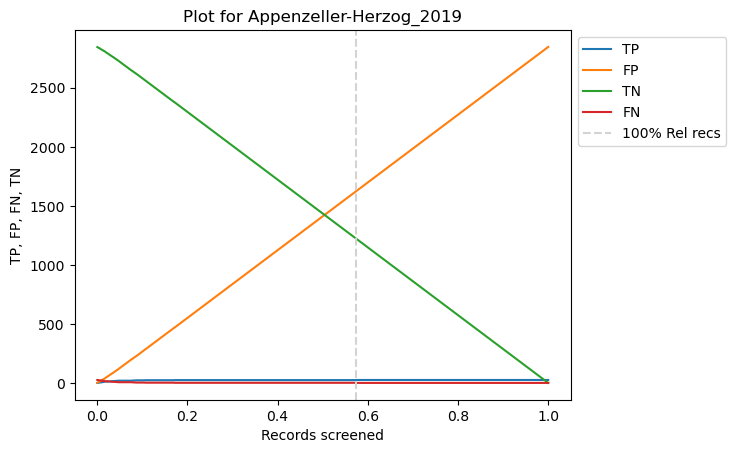

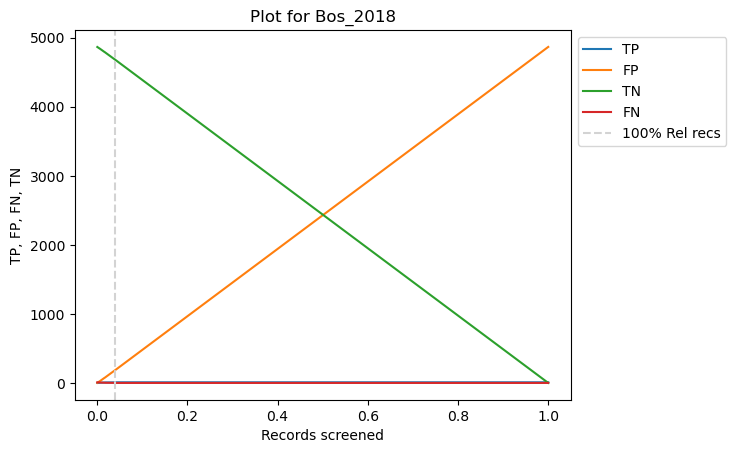

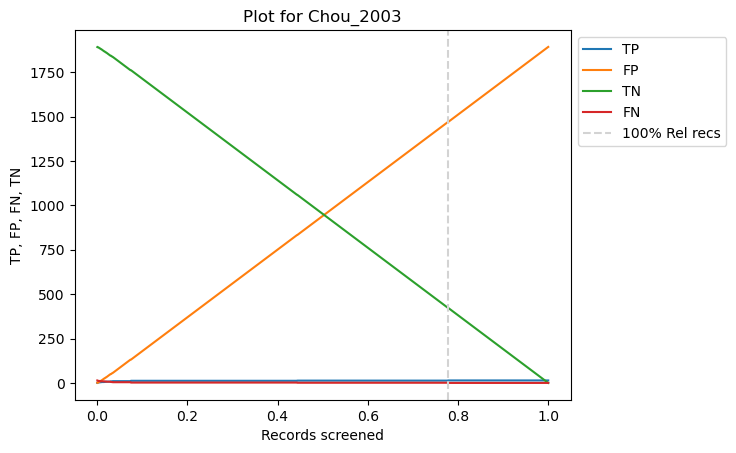

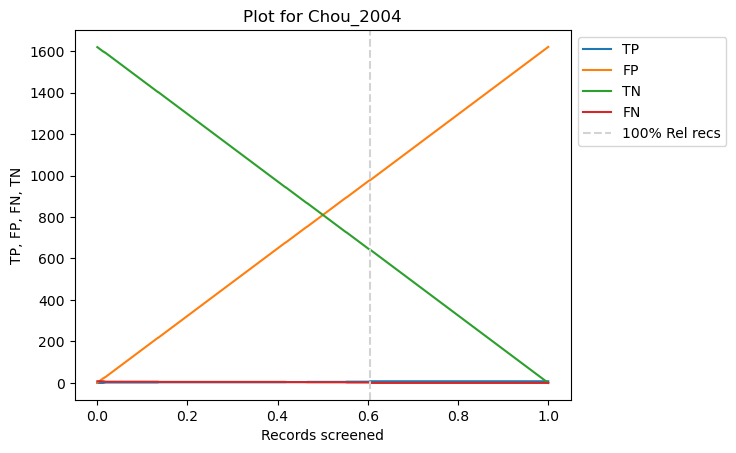

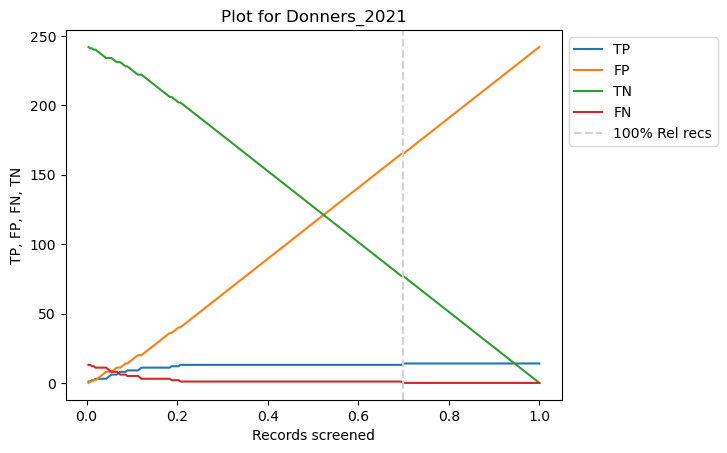

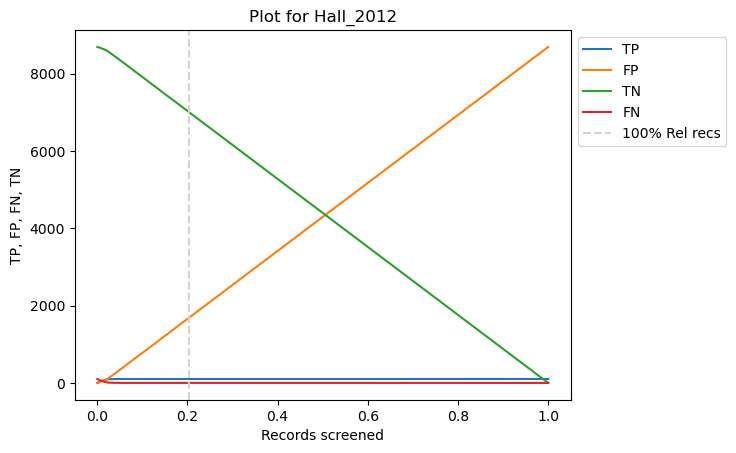

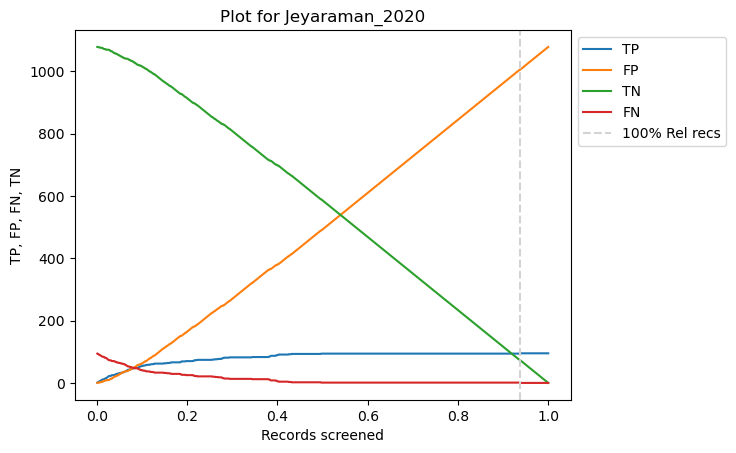

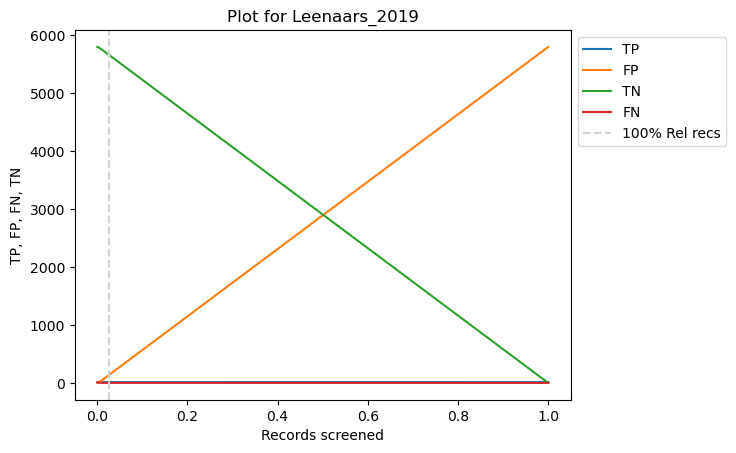

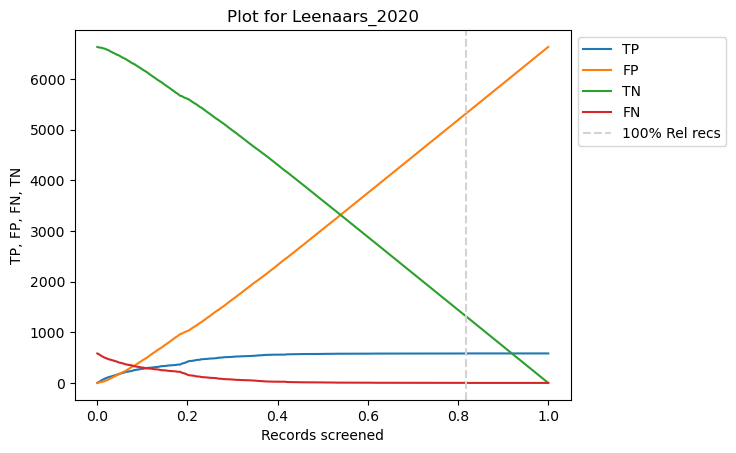

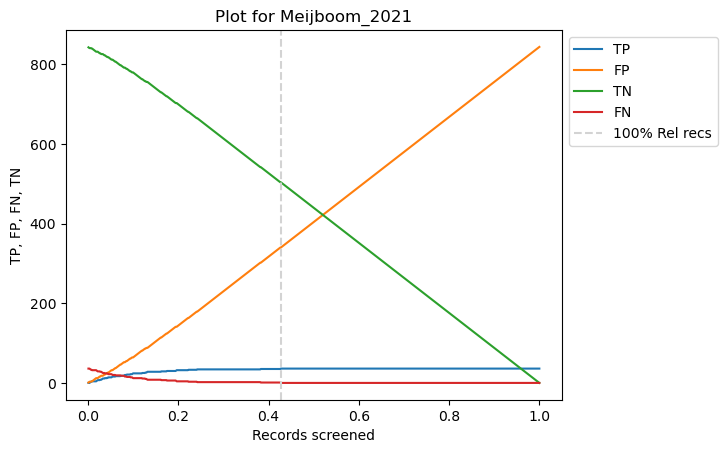

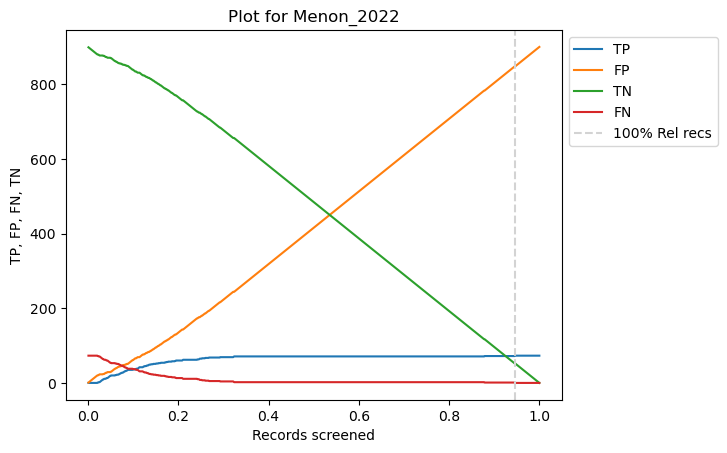

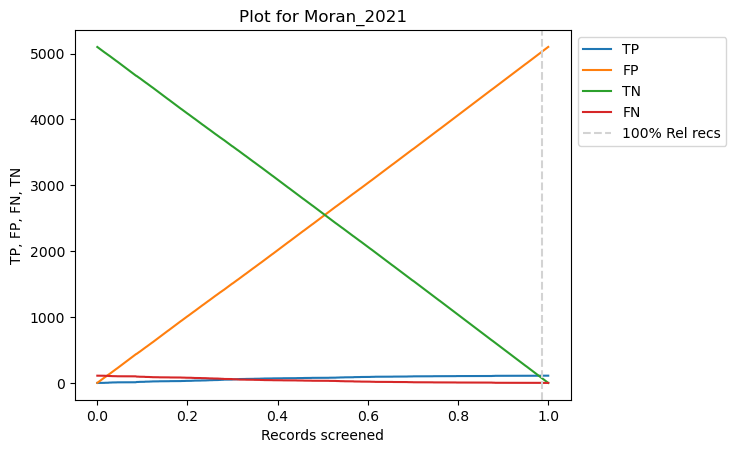

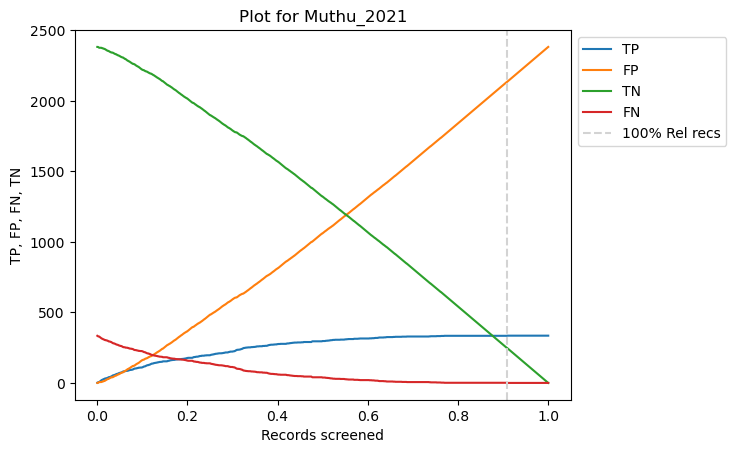

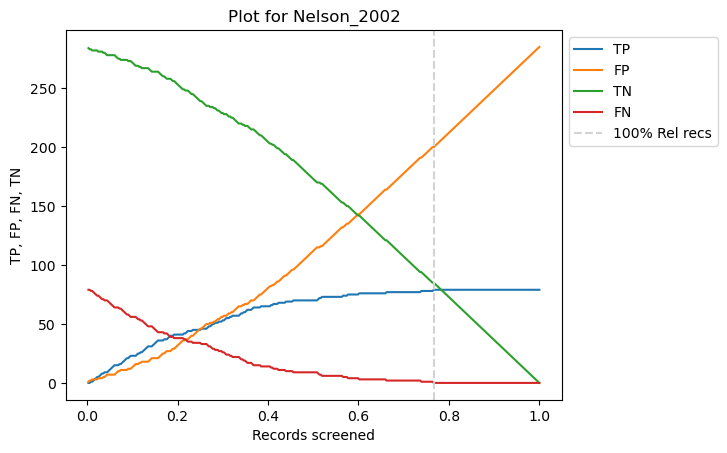

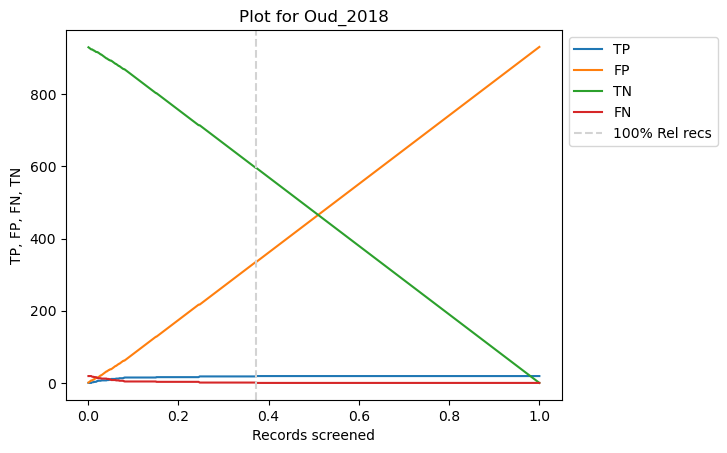

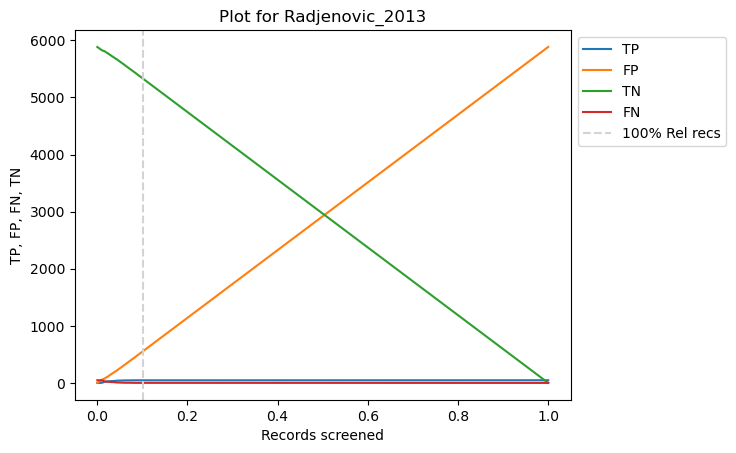

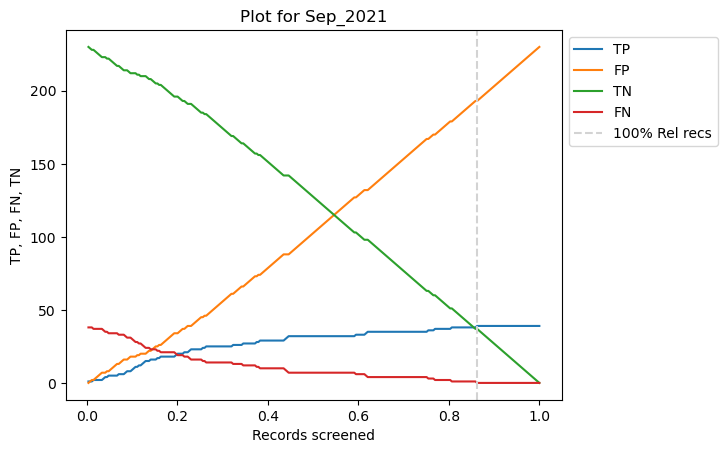

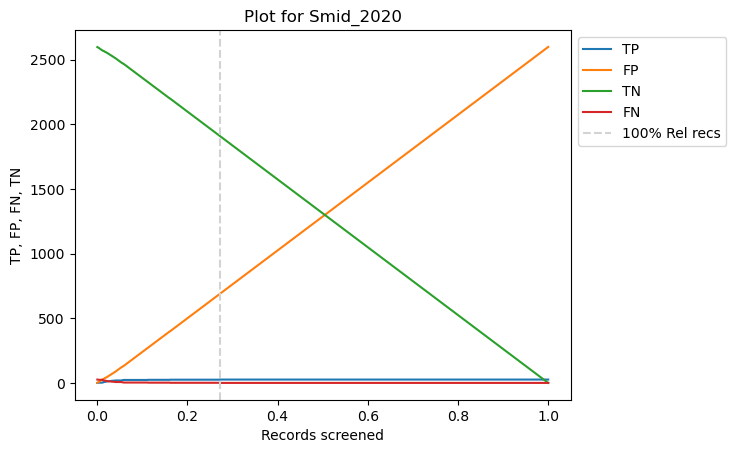

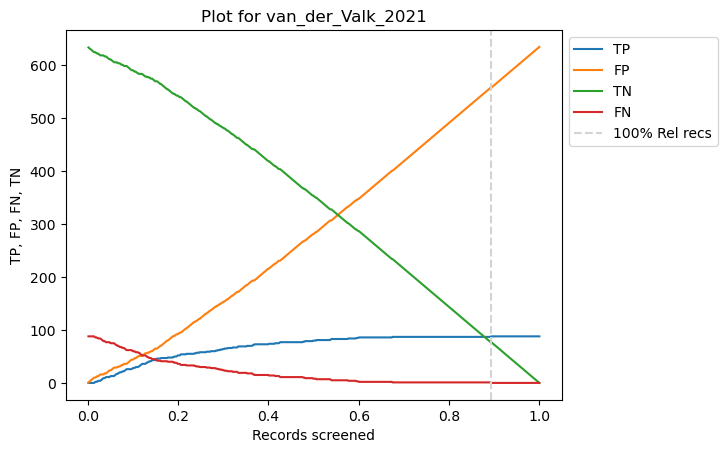

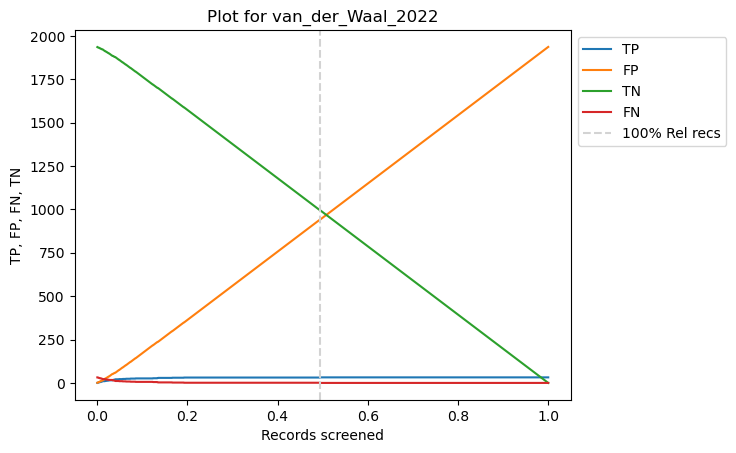

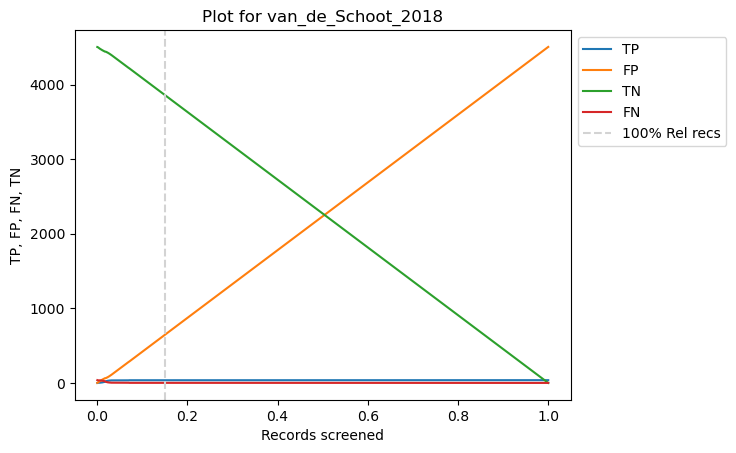

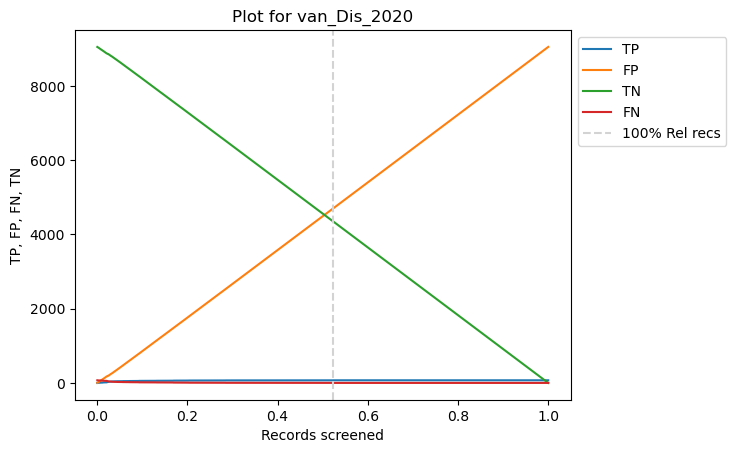

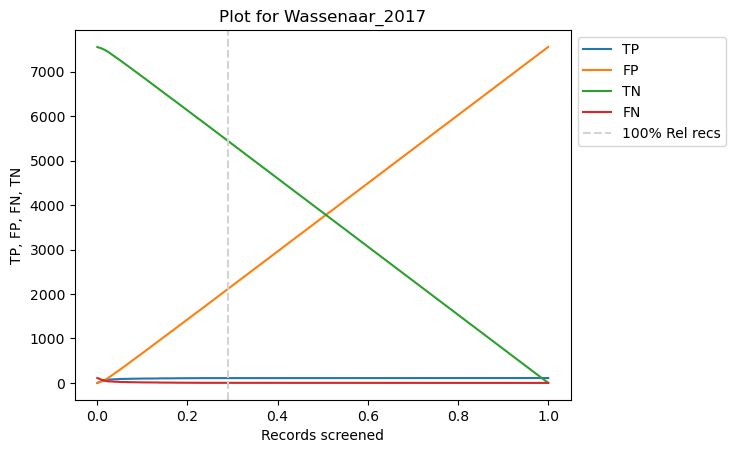

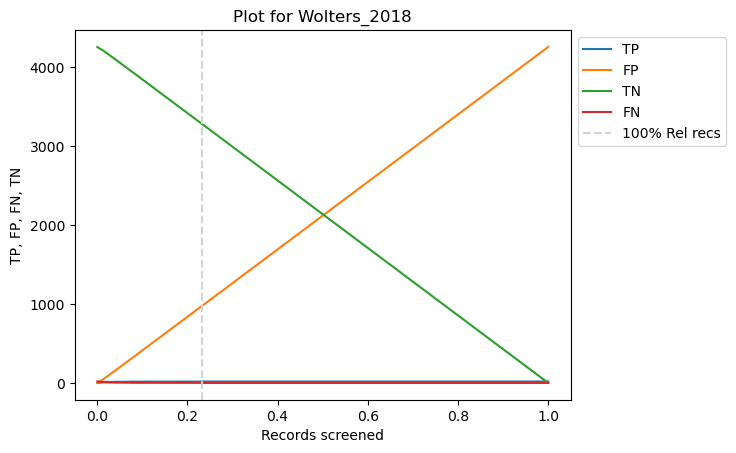

In [52]:
cm_plots(labels_dict_i)

## Analysis

To provide a preliminary analysis of the difference in WSS95% and TNR95% scores across datasets. A default simulation (TF-IDF + NB) was run on 24 datasets of the synergy dataset. (Note: Brouwer_2019 and Walker_2018 are excluded due to their high computation time)



In [53]:
#specify filepath with data_metrics.csv generated by makita
os.chdir('C:/.../')

In [54]:
syn = pd.read_csv('SYN.csv') 
syn

,Unnamed: 0,file_name,recall_0.1,recall_0.25,recall_0.5,recall_0.75,recall_0.9,wss_0.95,erf_0.1,atd,...,fn_1,tnr_0.1,tnr_0.25,tnr_0.5,tnr_0.75,tnr_0.8,tnr_0.85,tnr_0.9,tnr_0.95,tnr_1
0,13,Appenzeller-Herzog_2019_0.json,0.880000,0.960000,0.960000,1.000000,1.000000,0.794845,0.800000,169.960000,...,0,0.997189,0.991216,0.981026,0.962052,0.929023,0.925861,0.921293,0.901616,0.429726
1,14,Bos_2018_0.json,1.000000,1.000000,1.000000,1.000000,1.000000,0.815217,0.888889,65.777778,...,0,0.000000,0.995274,0.993014,0.985206,0.984179,0.984179,0.983357,0.983357,0.963427
2,15,Chou_2003_0.json,0.857143,0.857143,0.928571,0.928571,1.000000,0.449108,0.785714,207.642857,...,0,0.998943,0.998943,0.983615,0.970402,0.930761,0.930761,0.930761,0.559725,0.223573
3,0,Chou_2004_0.json,0.250000,0.375000,0.625000,1.000000,1.000000,0.208845,0.125000,572.625000,...,0,0.000000,0.983333,0.582099,0.448148,0.448148,0.448148,0.397531,0.397531,0.396914
4,1,Donners_2021_0.json,0.642857,0.928571,0.928571,1.000000,1.000000,0.687500,0.571429,32.071429,...,0,1.000000,0.991736,0.954545,0.917355,0.917355,0.917355,0.851240,0.834711,0.318182
5,16,Hall_2012_0.json,0.990291,1.000000,1.000000,1.000000,1.000000,0.910818,0.893204,122.563107,...,0,0.999424,0.998273,0.994705,0.990677,0.990447,0.989641,0.988605,0.984692,0.806054
6,2,Jeyaraman_2020_0.json,0.568421,0.778947,0.989474,0.989474,0.989474,0.543052,0.473684,166.673684,...,0,0.997217,0.988868,0.956401,0.833952,0.785714,0.769944,0.661410,0.648423,0.068646
7,12,Leenaars_2019_0.json,1.000000,1.000000,1.000000,1.000000,1.000000,0.894664,0.875000,31.875000,...,0,1.000000,0.999310,0.999137,0.995340,0.995340,0.995340,0.993096,0.990853,0.975664
8,17,Leenaars_2020_0.json,0.475945,0.826460,0.984536,0.998282,1.000000,0.576795,0.376289,1031.510309,...,0,0.996984,0.981604,0.926267,0.836550,0.820115,0.783625,0.736429,0.679885,0.197678
9,3,Meijboom_2021_0.json,0.666667,0.944444,1.000000,1.000000,1.000000,0.688636,0.555556,88.861111,...,0,0.996445,0.978673,0.945498,0.895735,0.895735,0.853081,0.832938,0.787915,0.597156


In [55]:
#Add difference (TNR95% - WSS95%) column
syn_wt = syn[['file_name', 'wss_0.95', 'tnr_0.95']]
syn_wt = syn_wt.assign(difference=syn_wt['tnr_0.95'] - syn_wt['wss_0.95'])

#Format file name
remove_right = '_0.json'
remove_left = 'metrics_sim_'
syn_wt['file_name'] = syn_wt['file_name'].str.rstrip(remove_right)
syn_wt['file_name'] = syn_wt['file_name'].str.lstrip(remove_left)

#Sort by file name
syn_wt = syn_wt.sort_values('file_name', ascending=True)


In [56]:
#Add class imbalance column
class_imbalance=[0.9,0.2,0.8,0.6,5.8,1.2,8.2,0.3,8.1,4.2,7.6,2.1,12.4,21.9,2.1,0.8,14.8,1,0.8,12.3,1.7,0.8,1.4,0.4]
syn_wt['class_imbalance']=class_imbalance
syn_wt


,file_name,wss_0.95,tnr_0.95,difference,class_imbalance
0,Appenzeller-Herzog_2019,0.794845,0.901616,0.106771,0.9
1,Bos_2018,0.815217,0.983357,0.168140,0.2
2,Chou_2003,0.449108,0.559725,0.110617,0.8
3,Chou_2004,0.208845,0.397531,0.188686,0.6
4,Donners_2021,0.687500,0.834711,0.147211,5.8
5,Hall_2012,0.910818,0.984692,0.073874,1.2
6,Jeyaraman_202,0.543052,0.648423,0.105371,8.2
7,Leenaars_2019,0.894664,0.990853,0.096189,0.3
8,Leenaars_202,0.576795,0.679885,0.103090,8.1
9,Meijboom_2021,0.688636,0.787915,0.099279,4.2


In [62]:
#Check normality assumption
print(shapiro(syn_wt['difference']))
print(shapiro(syn_wt['class_imbalance']))

ShapiroResult(statistic=0.8883335590362549, pvalue=0.012280217371881008)
ShapiroResult(statistic=0.7565858960151672, pvalue=6.2245708249975e-05)


Both distributions are not normal, therefore a spearman correlation is performed.

## Spearman correlation:  Class imabalance & difference in scores

In [57]:
# Extract the values from the columns
x = syn_wt['difference'].values
y = syn_wt['class_imbalance'].values

# Calculate the Spearman correlation coefficient and p-value
correlation, p_value = spearmanr(x, y)

# Print the correlation coefficient and p-value
print("Spearman correlation coefficient:", correlation)
print("p-value:", p_value)

Spearman correlation coefficient: 0.1573332042355128
p-value: 0.46281639212584
